In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 解題步驟：

1. 將 train.csv, test.csv 合併
2. 取出 LotFrontage, GarageYrBlt, MasVnrArea 三個特徵的資料
3. 分別以平均值及中位數來填補缺失值
4. 分析缺失值，練習繪製直方圖及機率圖 (如下圖)
5. 分別計算原本、以平均值填補、以中位數填補的標準差
6. 課後問答

<img src="./data/hist_plot.png" style="zoom:100%;" />

## Hint

* [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
* [seaborn.histplot](


## 讀取資料

In [4]:
""" Your code hear: 讀取 train.csv, test.csv 並合併 """
train = pd.read_csv("../Example/week3/train.csv")
test = pd.read_csv("../Example/week3/test.csv")
total = pd.concat([train,test]).reset_index()

## 分離目標

In [40]:
# 將目標分析欄位取出來
""" Your code hear: """
col = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]

## 繪圖

<AxesSubplot:>

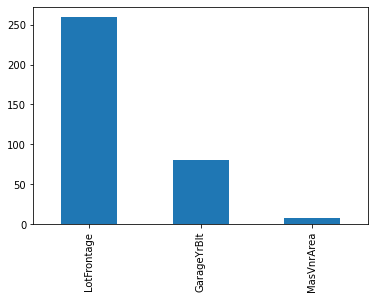

In [37]:
# 繪圖
""" Your code hear: """
miss_df=total[col].isnull().sum()
miss_df=miss_df[miss_df>0].sort_values(ascending=False)
miss_df.plot.bar()

In [38]:
discrete = total.columns[total.dtypes == 'object']
for i , col  in zip(miss_df[miss_df>0] ,miss_df.index):
    if col in discrete:
        print(f'{col:12} is discrete.' ,end = ' ')
    else:
        print(f'{col:12} is continual.' ,end = ' ')
    print(f'Missing {i / total.shape[0] :.4%}')

LotFrontage  is continual. Missing 17.7397%
GarageYrBlt  is continual. Missing 5.5479%
MasVnrArea   is continual. Missing 0.5479%


## 填補平均值、中位數



In [49]:
train_mean=train[col].mean()
train_median = train[col].median()

In [64]:

mean_df =pd.DataFrame()
median_df =pd.DataFrame()
for i in col:
    mean_df[i] = total[i].fillna(train_mean[i])
    median_df[i] = total[i].fillna(train_median[i])


## 分析標準差

<AxesSubplot:>

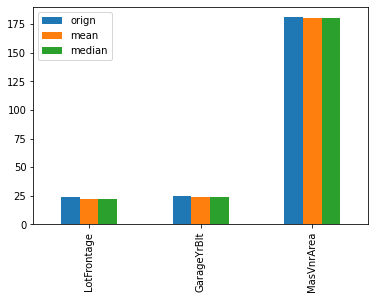

In [107]:
""" Your code hear: """
pd.DataFrame({"orign":total[col].std() , "mean":mean_df.std(),"median":median_df.std()}).plot.bar()

## 透過分析標準差可以得到什麼結果？

填補後各標準差比較下來，無影響，表示該特徵填補空值後，該特徵的分布沒有影響到